In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
from sklearn.preprocessing import OrdinalEncoder
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pywt


In [3]:
cal = pd.read_csv('calendar.csv')
ste = pd.read_csv('sales_train_evaluation.csv')
price = pd.read_csv('sell_prices.csv')

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


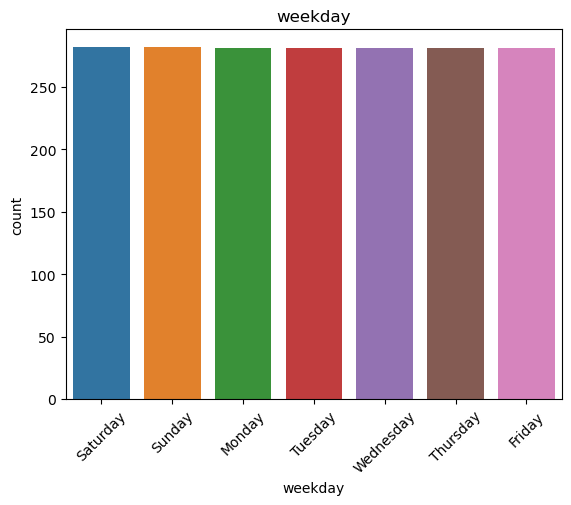

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


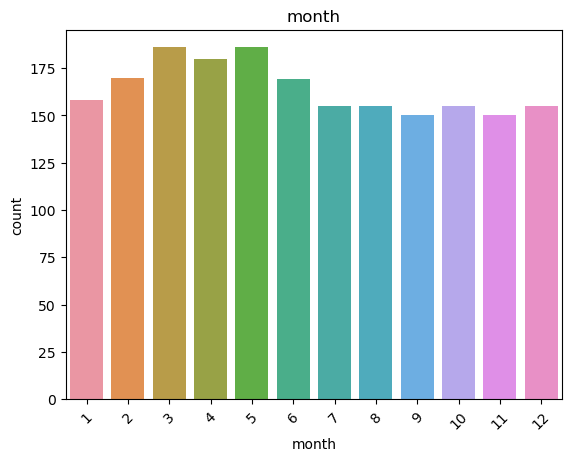

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


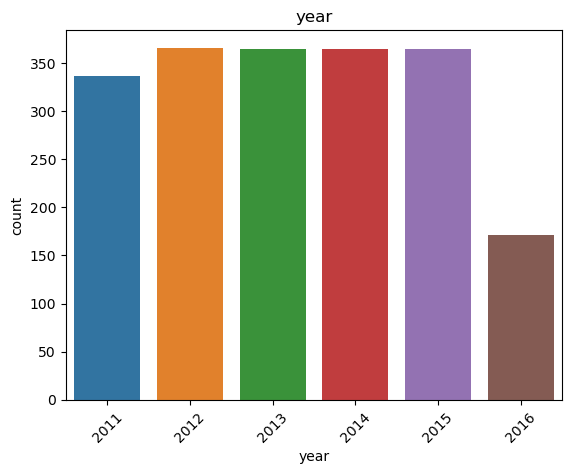

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


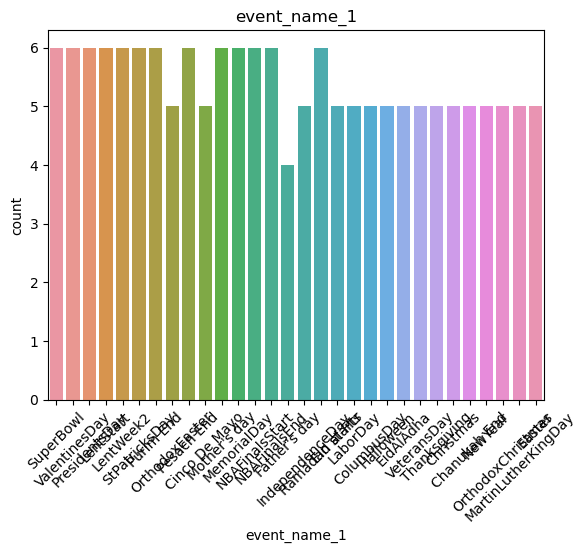

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


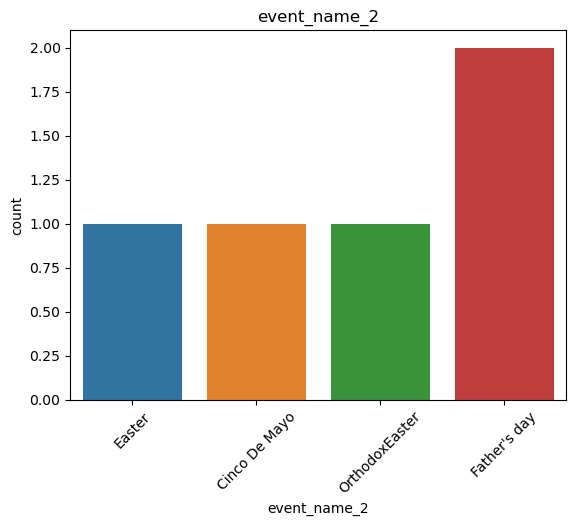

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


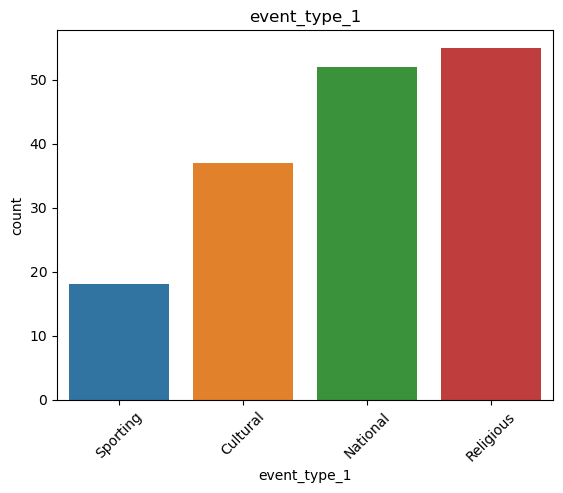

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


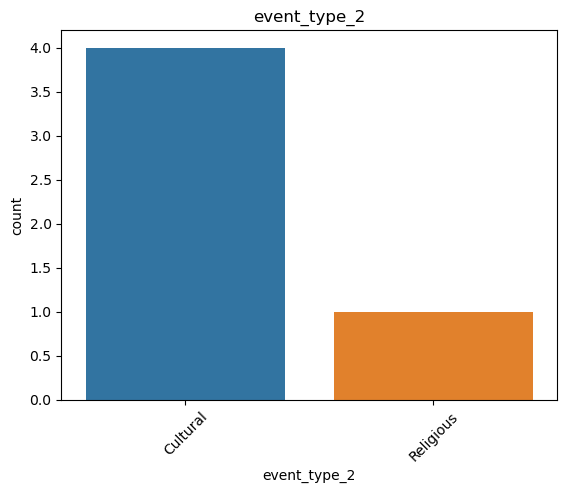

In [5]:
for col in ['weekday','month','year','event_name_1','event_name_2','event_type_1','event_type_2']:
    sns.countplot(cal[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


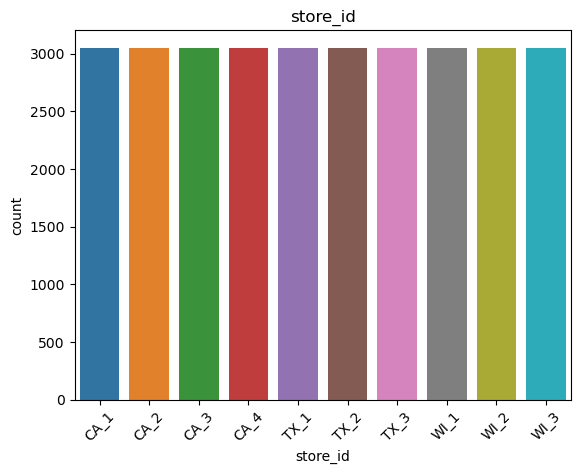

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


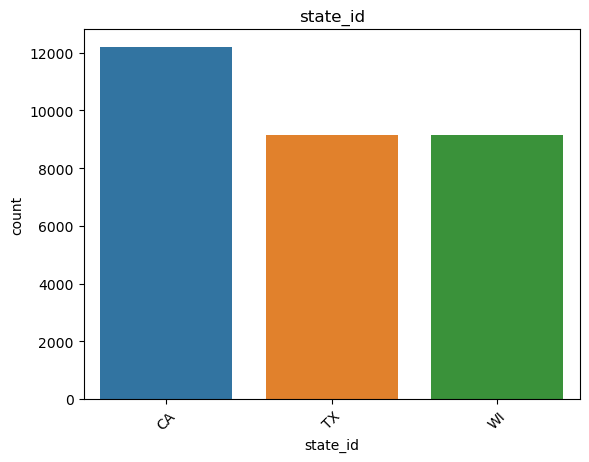

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


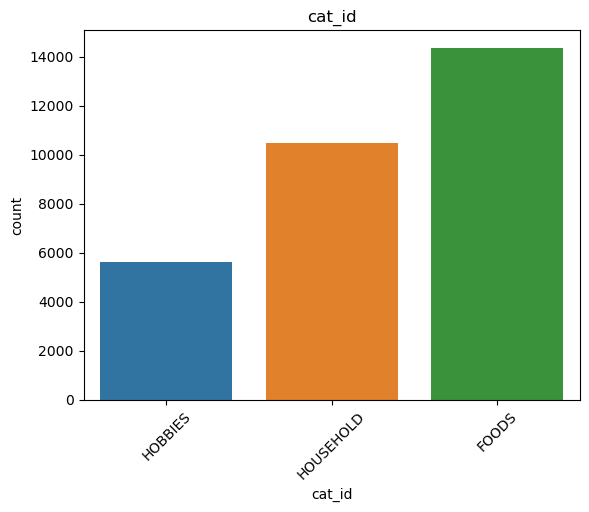

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


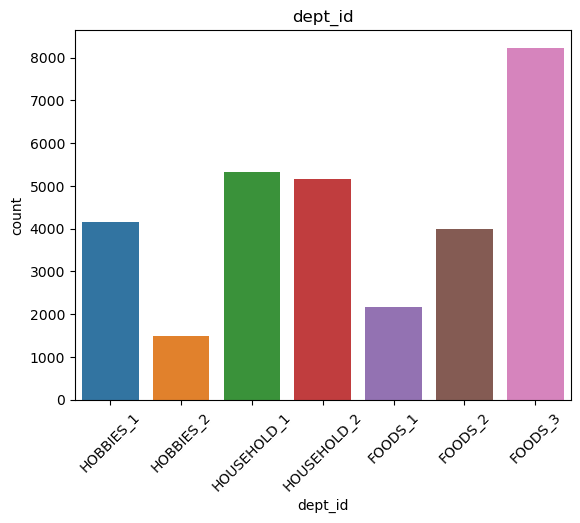

In [7]:
# STE 
for col in ['store_id','state_id','cat_id','dept_id']:
    sns.countplot(ste[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

Text(0.5, 1.0, 'HOBBIES_1_001_CA_1_evaluation')

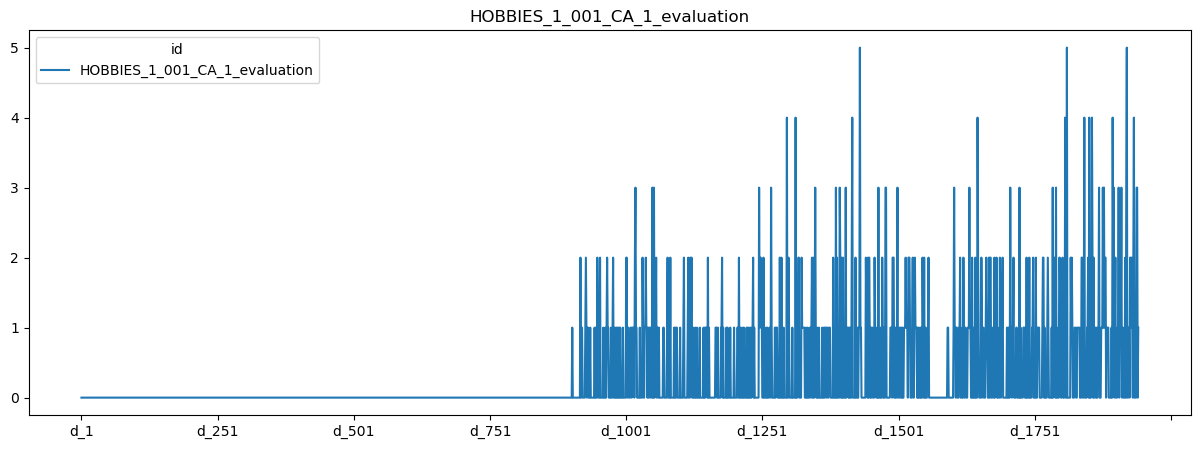

In [16]:
# Analyzing Sales pattern for a product
d_cols=[ele for ele in ste.columns if 'd_' in ele]
ste.loc[ste['id']=='HOBBIES_1_001_CA_1_evaluation'].set_index('id')[d_cols].T.plot(figsize=(15, 5))
plt.title('HOBBIES_1_001_CA_1_evaluation')

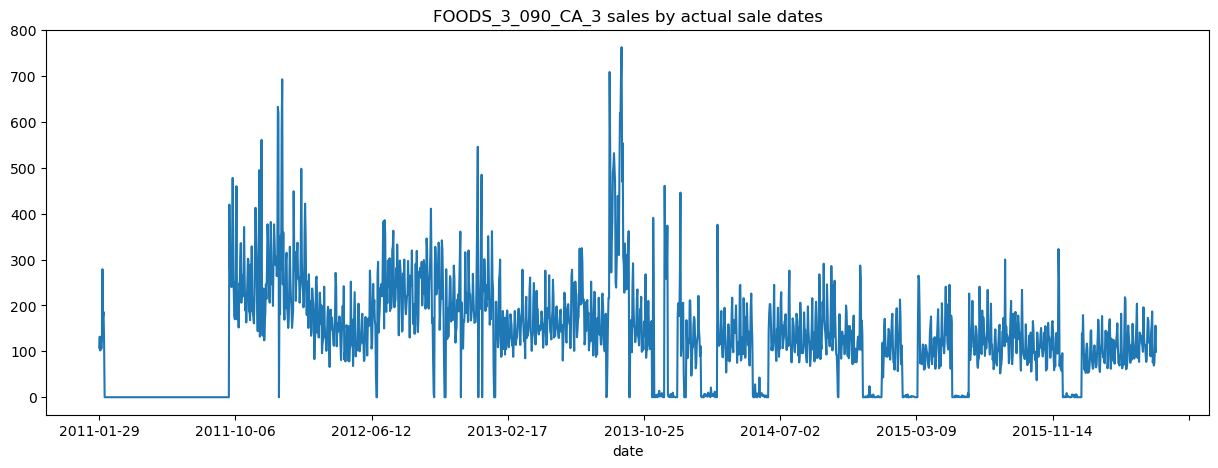

In [17]:
example1 = ste.loc[ste['id'] == 'FOODS_3_090_CA_3_evaluation'][d_cols].T
example1=example1.rename(columns={8412:'FOODS_3_090_CA_3_evaluation'})
example1 = example1.reset_index().rename(columns={'index': 'd'})
example1 = example1.merge(cal, how='left', validate='1:1')
example1.set_index('date')['FOODS_3_090_CA_3_evaluation'].plot(figsize=(15, 5))
plt.title('FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

<AxesSubplot:>

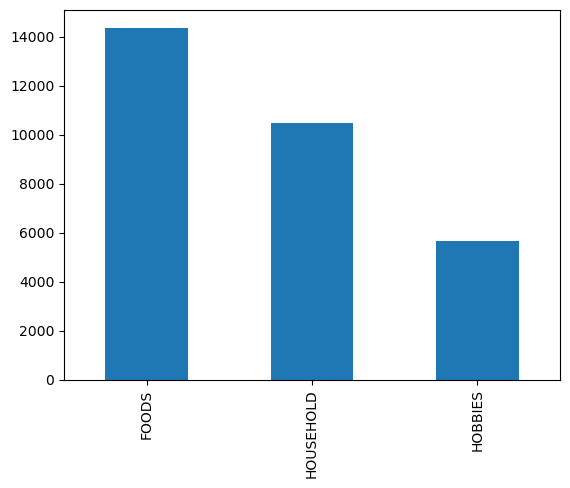

In [18]:
ste.cat_id.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='date'>

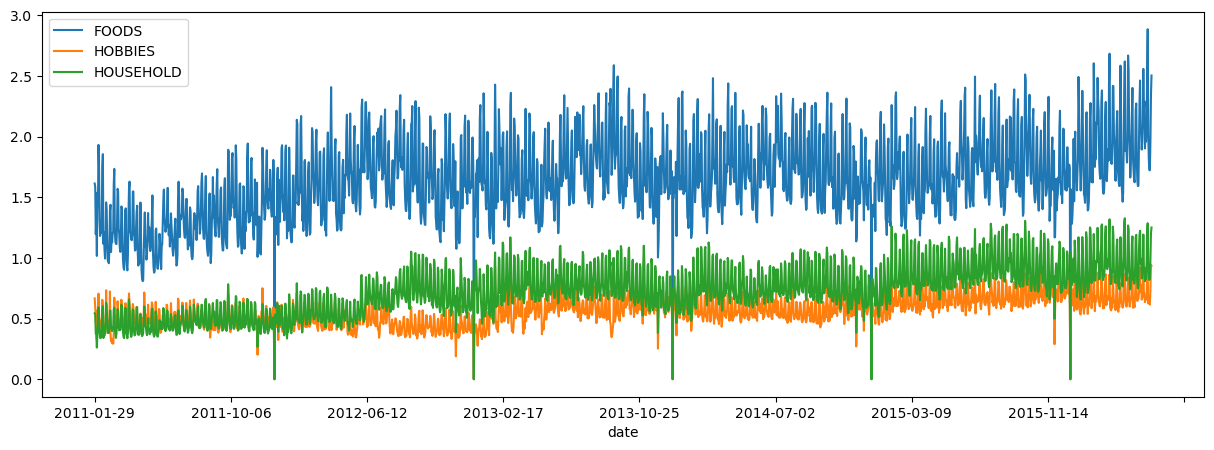

In [20]:
temp = ste.groupby('cat_id').mean().T.reset_index().rename(columns={'index':'d'})\
.merge(cal[['date','d']],how='left',validate='1:1').set_index('date')

temp.plot(figsize=(15,5))

<AxesSubplot:xlabel='date'>

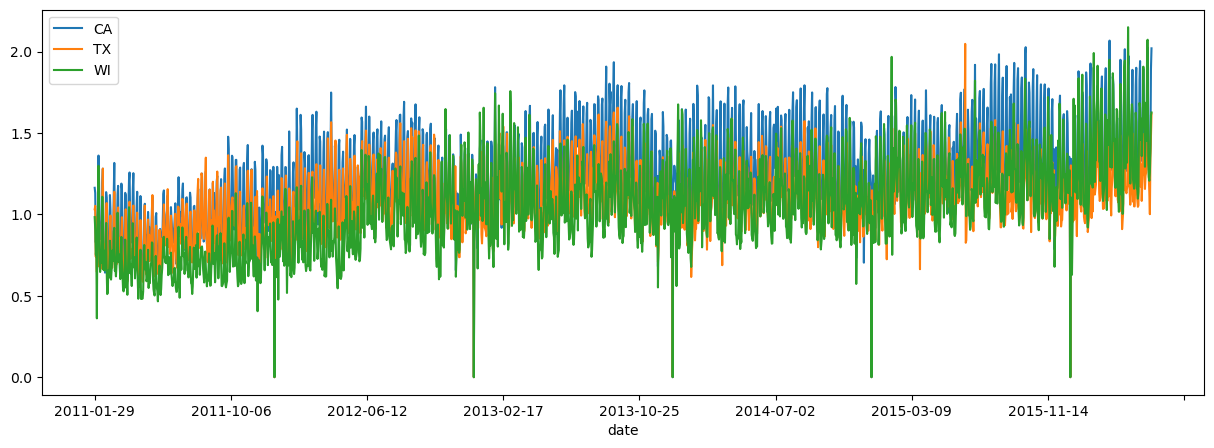

In [21]:
temp  = ste.groupby('state_id').mean().T.reset_index().rename(columns={'index':'d'})\
.merge(cal[['date','d']],how='left',validate='1:1').set_index('date')

temp.plot(figsize=(15,5))

In [23]:
# Checking the impact of rolling standard deviation
price_gr=price.groupby(['store_id','item_id'])['sell_price']
price["pct_diff"] = price_gr.pct_change()
price["price_roll_sd3"] = price_gr.transform(lambda x: x.rolling(3).std())
price["price_roll_sd7"] = price_gr.transform(lambda x: x.rolling(7).std())
price["price_roll_sd14"] = price_gr.transform(lambda x: x.rolling(14).std())
price["price_roll_sd28"] = price_gr.transform(lambda x: x.rolling(28).std())

<AxesSubplot:>

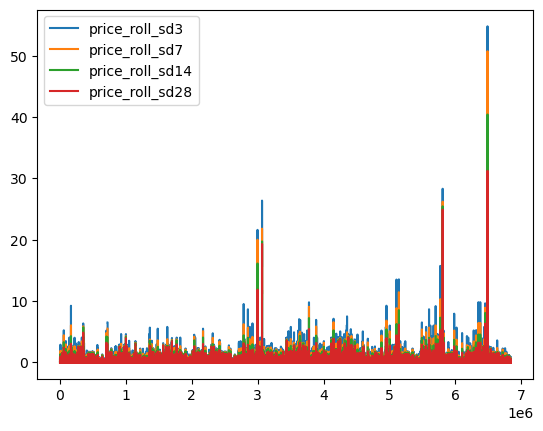

In [26]:
price[['price_roll_sd3','price_roll_sd7','price_roll_sd14','price_roll_sd28']].plot()

In [28]:
# Reason for creating lag variables
temp=ste.groupby('store_id').mean().T
moving_avg_dict={}

for ele in temp.columns:
    moving_avg_dict[ele]=[]
    
    for i in range(0,len(temp[ele])-30,10):
        moving_avg_dict[ele].append(np.mean(temp[ele][i:i+20]))
        
movng_store_avg_df=pd.DataFrame.from_dict(moving_avg_dict)

<AxesSubplot:>

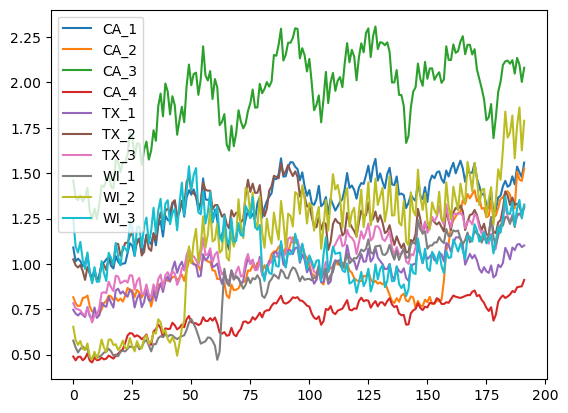

In [29]:
movng_store_avg_df.plot()